# Simulating a market model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp

DAYS_IN_A_YEAR = 365

## Simulating a Brownian Motion

From theorem 10.2.1, we know that there exists a process $(B_t)$ such that:

1. The paths of $(B_t)$ are continuous
2. $\forall \space 0 \leq u \leq t, (B_t - B_u) \perp \sigma(B_v; v \leq u)$
3. $\forall \space 0 \leq u \leq t, (B_t - B_u) \sim \mathcal{N}(0, t - u)$

Let's ignore 1. for a moment, and imagine that we are operating over a time horizon (0, T), and we are interested in simulating a Market in this time horizon. Because all of the randomness in our market comes from a Brownian motion process, we are interested in generating a Brownian motion over this time horizon. 

Now, let's divide our time horizon in $n$ steps, obtaining periods of lenght $\Delta t = T/n$. We can then define the Brownian Motion increment $B_{\Delta t_i}$ as the random variable:

$$
B_{\Delta t_i} = B_{t_i + \Delta t} - B_{t_i}
$$


In this setting, we can express $B_T$ as :

$$
B_T = \sum_{i = 0}^{n - 1} B_{t_i + \Delta t} - B_{t_i} = \sum_{i = 0}^{n - 1} B_{\Delta t_i}
$$

What do we know about the behaviour of $B_{\Delta t_i}$:

* The increments are independent: $B_{\Delta t_i}  \perp \sigma(B_{\Delta t_j}; i \neq j)$
* The increments are normally distributed with variance $~\Delta t$: $B_{\Delta t_i}  \sim \mathcal{N}(0, \Delta t)$

Hence, we can easily simulate these increments:

In [2]:
def simulate_bm_increments(mu, sigma, n_steps, time_delta, size):
    """
        Function that simulates increments of Brownian Motion
        with drift mu and variance sigma, over a period of time
        time_delta.
    """
    normal_increments = np.random.normal(0, 1, size = (n_steps, size)) 
    increments = np.sqrt(time_delta)*sigma*normal_increments + mu*time_delta
    return increments

And hence our BM paths:

In [3]:
def simulate_bm(T, n_steps, mu, sigma, n_paths):
    """
        Simulates Bwonian motion
    """
    time_delta = T/n_steps
    increments = np.concatenate([
        np.zeros((1, n_paths)),
        simulate_bm_increments(mu, sigma, n_steps, time_delta, n_paths)
    ])
    return np.cumsum(increments, axis = 0)

In [4]:
T = 1
time_delta = T/DAYS_IN_A_YEAR
n_paths = 10000
sigma = 0.1

bm_paths = simulate_bm(T, DAYS_IN_A_YEAR, 0, sigma, n_paths)

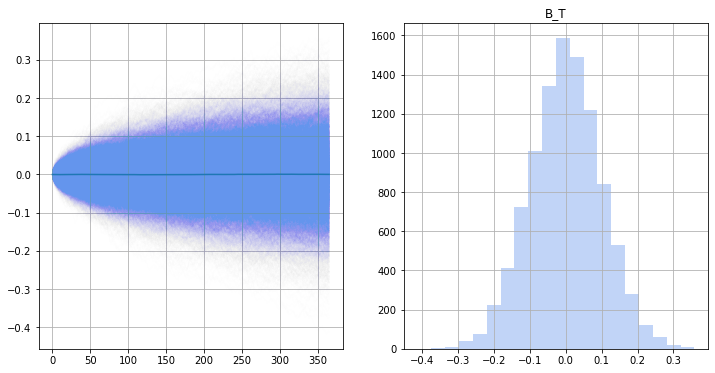

In [5]:
_, axs = plt.subplots(1, 2, figsize = (12, 6))
ax = axs[0]
for i in range(bm_paths.shape[1]):
    real = bm_paths[:, i]
    ax.plot(real, alpha = 0.005, color = "cornflowerblue")

ax.plot(bm_paths.mean(axis = 1))
ax.grid()
ax = axs[1]
plt.hist(bm_paths[-1, :], bins = 20, alpha = 0.4, color = "cornflowerblue");
ax.grid()
ax.set_title("B_T");

## Simulating a Geometric Brownian Motion

In [7]:
def simulate_gbm(T, n_steps, mu, sigma, size):
    """
        Simulates Geometric Brownian motion
    """
    time_delta = T/n_steps
    standard_bm = simulate_bm(T, n_steps, 0, 1, size)
    gbm_drift = (np.arange(0, n_steps + 1)*time_delta).reshape(n_steps + 1, 1)*(mu - 0.5*(sigma**2))
    gbm = np.exp(gbm_drift + standard_bm*sigma)
    return gbm

In [8]:
gbm_paths = simulate_gbm(T, DAYS_IN_A_YEAR, 0, sigma, n_paths)

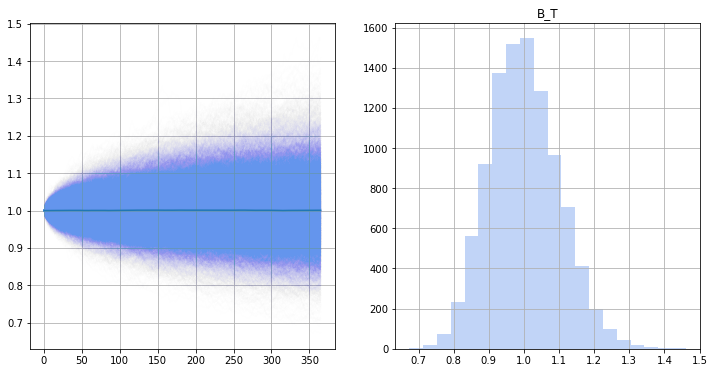

In [9]:
_, axs = plt.subplots(1, 2, figsize = (12, 6))
ax = axs[0]
for i in range(bm_paths.shape[1]):
    real = gbm_paths[:, i]
    ax.plot(real, alpha = 0.005, color = "cornflowerblue")

ax.plot(gbm_paths.mean(axis = 1))
ax.grid()
ax = axs[1]
plt.hist(gbm_paths[-1, :], bins = 20, alpha = 0.4, color = "cornflowerblue");
ax.grid()
ax.set_title("B_T");

## Simulate SDE in general